In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import regularizers

RANDOM_SEED = 42

In [16]:
tf.keras.utils.set_random_seed(RANDOM_SEED)

In [17]:
def generate_net(start, step, elements):
    net = []
    for i in range(0, elements):
        net.append(start + step * i)
    for i in range(elements - 2, -1, -1):
        net.append(start + step * i)
    return net


def generate_nets(start, step, number_of_nets):
    nets = []
    for i in range(2, number_of_nets + 2):
        nets.append(generate_net(start, step, i))
    return nets


In [18]:
def get_data():
    data = load_digits()

    X = data.data
    y = data.target
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(max(y) + 1))
    y = label_binarizer.transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

    return X_train, X_test, y_train, y_test

In [19]:
def compile_fit(net, X_train, y_train, X_test, y_test, l1, l2):
    kernel_regularizer = regularizers.L1L2(l1=l1, l2=l2)

    model = Sequential()
    model.add(Dense(net[0], input_dim=X_train.shape[1], activation='relu', kernel_regularizer=kernel_regularizer))
    for i in range(1, len(net)):
        model.add(Dense(net[i], activation='relu', kernel_regularizer=kernel_regularizer))
    model.add(Dense(10, activation='sigmoid', kernel_regularizer=kernel_regularizer))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
    return model, history

In [20]:
def plot_epoch_losses(histories):
    figure = plt.figure(figsize=(8, 6))

    axes = figure.add_subplot(1, 1, 1)
    axes.plot(histories[0].history['loss'], label='loss', linestyle='--', color='#003B80')
    axes.plot(histories[0].history['val_loss'], label='val_loss', color='#003B80')
    axes.set_title(f'Net')
    axes.set_xlabel('epochs')
    axes.set_ylabel('loss')
    axes.set_ylim(0, 3.1)
    axes.legend()

    figure.tight_layout()
    return figure

In [21]:
X_train, X_test, y_train, y_test = get_data()
sample_nets = [[16, 32, 64, 128, 256, 128, 64, 32, 16]]

In [22]:
models_histories = []

for i in range(0, len(sample_nets)):
    models_histories.append(compile_fit(sample_nets[i], X_train, y_train, X_test, y_test, 0, 0.03)[1])

In [23]:
losses = [history.history['loss'][-1] for history in models_histories]
val_losses = [history.history['val_loss'][-1] for history in models_histories]
neurons = [sum(net) for net in sample_nets]

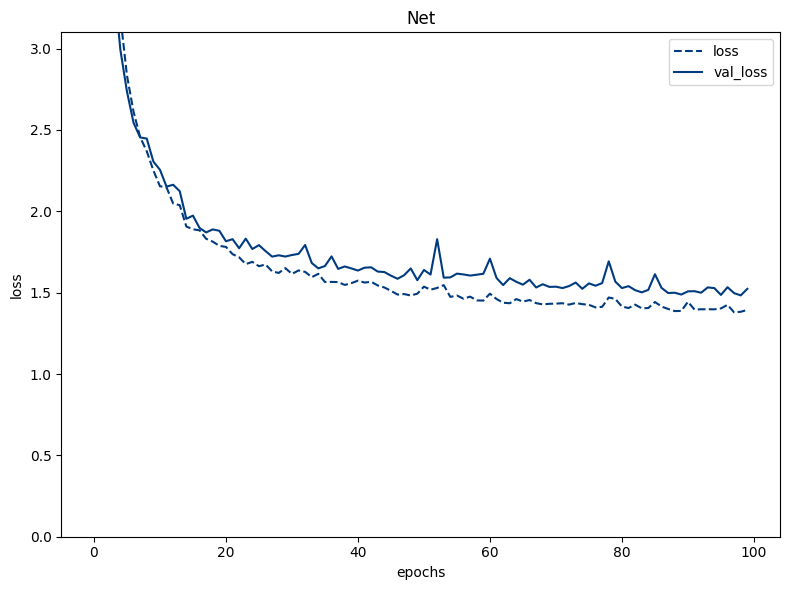

In [24]:
_ = plot_epoch_losses(models_histories)

In [25]:
sample_nets

[[16, 32, 64, 128, 256, 128, 64, 32, 16]]

In [26]:
neurons

[736]

In [27]:
losses

[1.3941335678100586]

In [28]:
val_losses

[1.5233335494995117]